I wrote SGD in the form of a module, just to be able to add more algorithms and test it easiy.

This is how it works

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import SGD

In [3]:
def testFunc(self,x):
    return [x[0]*self.w[0]+ self.w[1]]

def SME_loss(f,x,t):
    return np.mean([(f(x)[i] - _t)**2 for i,_t in enumerate(t)])

In [4]:
f=SGD.targetFunc(testFunc,[0.2,-2])
Q=SGD.lossFunc(SME_loss,f)


data=[]
xmin=-5
xmax=2
for i in range(20000):
    x=np.random.rand()*(xmax-xmin)+xmin
    data.append( [[x],[2*x+3 ]])

# sgd=SGD.VanillaSGD(Q ,data,alpha=1e-2)
sgd=SGD.AdaDeltaSGD(Q ,data,gamma=0.99,epsilon=1e-5,alpha=1)
# sgd=SGD.RMSpropSGD(Q ,data,gamma=1-1e-2,epsilon=1e-5,alpha=1e-2)

In [5]:
sgd.run(tol=1e-6, step_break=1000,max_step=25000),len(sgd.steps)

([2.0, 3.0], 2780)

<IPython.core.display.Javascript object>


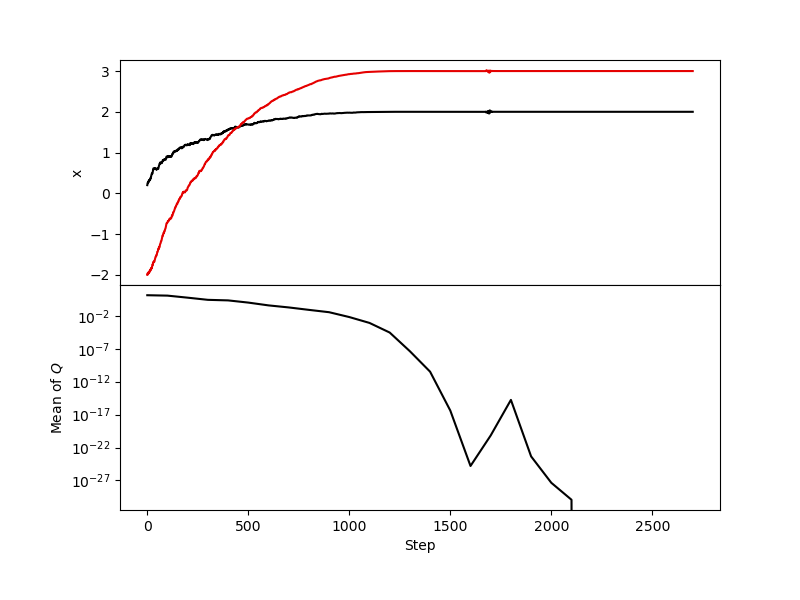

In [6]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)

sub.plot(np.array(sgd.steps)[:,0],c='xkcd:black')
sub.plot(np.array(sgd.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
steps=[]
_s=0
skip=100
for w in sgd.steps[::skip]:
    f.w=w
    mQ=0
    _r=range(len(data))
    mC=50
    for _ in range(mC): 
        i=np.random.choice(_r)
        mQ+=Q(data[i][0], data[i][1]) 
    meanQ.append(mQ/mC)
    steps.append(_s)
    _s+=skip
    
sub.plot(steps,meanQ,c='xkcd:black')

sub.set_ylabel('Mean of $Q$')

# sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()